# Season Progression

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from scipy.stats import beta
# import seaborn
# from scipy.stats import poisson,skellam
# import statsmodels.api as sm
# import statsmodels.formula.api as smf
# import statsmodels.tools.sm_exceptions as sm_exceptions
# from patsy import dmatrix, dmatrices

In [2]:
def insert_game_day(df_orig):
    df = df_orig.copy(deep=True)
    df['game_day'] = df.groupby(by='date').ngroup(ascending=True)
    return df

In [3]:
season_dfs = []
season_dfs.append(pd.read_csv("http://www.football-data.co.uk/mmz4281/1516/E0.csv", parse_dates=['Date'],
                              dayfirst=True))
season_dfs.append(pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/E0.csv", parse_dates=['Date'],
                              dayfirst=True))
season_dfs.append(pd.read_csv("http://www.football-data.co.uk/mmz4281/1718/E0.csv", parse_dates=['Date'],
                              dayfirst=True))
clean_season_dfs = []
for season_df in season_dfs:
    season_df = season_df[['Date','HST', 'AST', 'HomeTeam','AwayTeam','FTHG','FTAG']].copy(deep=True)
    season_df.rename(columns={'Date': 'date','HomeTeam': 'h', 'AwayTeam': 'a',
                              'FTHG': 'h_ftGoals', 'FTAG': 'a_ftGoals',
                              'HST': 'h_shotsOnTarget', 'AST': 'a_shotsOnTarget'}, inplace=True)
    season_df.sort_values(by='date', inplace=True)
    season_df = insert_game_day(season_df)
    clean_season_dfs.append(season_df)
full_df = pd.concat(clean_season_dfs, axis=0, sort=True)
full_df.head()

,a,a_ftGoals,a_shotsOnTarget,date,game_day,h,h_ftGoals,h_shotsOnTarget
0,Aston Villa,1,3,2015-08-08,0,Bournemouth,0,2
1,Swansea,2,10,2015-08-08,0,Chelsea,2,3
2,Watford,2,5,2015-08-08,0,Everton,2,5
3,Sunderland,2,5,2015-08-08,0,Leicester,4,8
4,Tottenham,0,4,2015-08-08,0,Man United,1,1


In [4]:
full_df.tail()

,a,a_ftGoals,a_shotsOnTarget,date,game_day,h,h_ftGoals,h_shotsOnTarget
372,Arsenal,1,4,2018-05-13,104,Huddersfield,0,3
371,West Brom,0,1,2018-05-13,104,Crystal Palace,2,5
370,Bournemouth,2,5,2018-05-13,104,Burnley,1,4
373,Brighton,0,1,2018-05-13,104,Liverpool,4,11
379,Everton,1,7,2018-05-13,104,West Ham,3,4


### Explore Shots on Target to Goals Ratio

In [5]:
clean_season_dfs[0]['ratio'] = clean_season_dfs[0]['h_ftGoals'] / clean_season_dfs[0]['h_shotsOnTarget']
clean_season_dfs[0].head()

,date,h_shotsOnTarget,a_shotsOnTarget,h,a,h_ftGoals,a_ftGoals,game_day,ratio
0,2015-08-08,2,3,Bournemouth,Aston Villa,0,1,0,0.000000
1,2015-08-08,3,10,Chelsea,Swansea,2,2,0,0.666667
2,2015-08-08,5,5,Everton,Watford,2,2,0,0.400000
3,2015-08-08,8,5,Leicester,Sunderland,4,2,0,0.500000
4,2015-08-08,1,4,Man United,Tottenham,1,0,0,1.000000


In [6]:
clean_season_dfs[0]['h_ftGoals'].sum() / clean_season_dfs[0]['h_shotsOnTarget'].sum()

0.3223422399090392

32% of shots on target were goals - binomial prob

In [7]:
ratios = clean_season_dfs[0]['h_ftGoals'] / clean_season_dfs[0]['h_shotsOnTarget']
print(np.min(ratios))
print(np.max(ratios))
print(np.mean(ratios))

0.0
2.0
0.34079208697171165


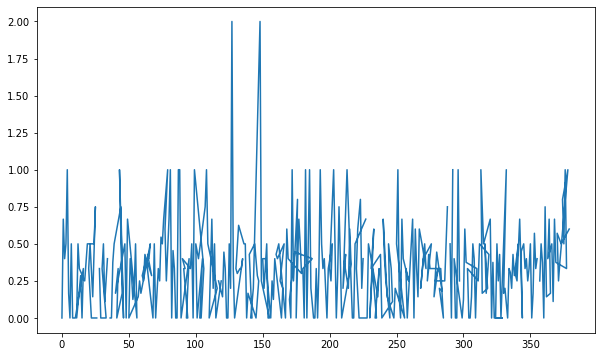

In [8]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ratios)
plt.show();

In [9]:
clean_season_dfs[0].loc[127:127, :]

,date,h_shotsOnTarget,a_shotsOnTarget,h,a,h_ftGoals,a_ftGoals,game_day,ratio
127,2015-11-21,1,3,West Brom,Arsenal,2,1,32,2.0


https://www.whoscored.com/Matches/959687/Live/England-Premier-League-2015-2016-West-Bromwich-Albion-Arsenal

Arsenal score at 27 minutes

West Brom score at 34 minutes

Arsenal score own goal at 39 minutes

Hence, ratio > 1

In [10]:
clean_season_dfs[0].loc[148:148, :]

,date,h_shotsOnTarget,a_shotsOnTarget,h,a,h_ftGoals,a_ftGoals,game_day,ratio
148,2015-12-06,1,1,Newcastle,Liverpool,2,0,38,2.0


https://www.whoscored.com/Matches/959648/Live/England-Premier-League-2015-2016-Newcastle-United-Liverpool
    
At 68 minutes an own goal by Liverpool

At 92 minutes Newcastle score

Hence a ratio > 1

In [11]:
clean_season_dfs[0][clean_season_dfs[0]['ratio'].isnull()]

,date,h_shotsOnTarget,a_shotsOnTarget,h,a,h_ftGoals,a_ftGoals,game_day,ratio
27,2015-08-23,0,5,Watford,Southampton,0,0,8,NaN
35,2015-08-29,0,9,Newcastle,Arsenal,0,1,10,NaN
118,2015-11-08,0,3,Aston Villa,Man City,0,0,31,NaN
226,2016-01-23,0,4,West Brom,Aston Villa,0,0,57,NaN
289,2016-03-12,0,3,Norwich,Man City,0,0,71,NaN
298,2016-03-19,0,1,West Brom,Norwich,0,1,74,NaN
356,2016-05-07,0,3,Aston Villa,Newcastle,0,0,93,NaN


Quite a few matches where 0 shots on Target, and 0 Goals - How to deal with these?

I guess ignore, or count as zeros ?

Not sure - Will think about this problem - In the meantime, will go forward with following strategy

+ Any ratios > 1 , set to 1
+ Any np.NaNs, ignore


### Clip the Ratios

In [12]:
clean_season_dfs[0]['ratio'] = (clean_season_dfs[0]['h_ftGoals'] /
                                clean_season_dfs[0]['h_shotsOnTarget']).clip(upper=1.0)
clean_season_dfs[0].head()

,date,h_shotsOnTarget,a_shotsOnTarget,h,a,h_ftGoals,a_ftGoals,game_day,ratio
0,2015-08-08,2,3,Bournemouth,Aston Villa,0,1,0,0.000000
1,2015-08-08,3,10,Chelsea,Swansea,2,2,0,0.666667
2,2015-08-08,5,5,Everton,Watford,2,2,0,0.400000
3,2015-08-08,8,5,Leicester,Sunderland,4,2,0,0.500000
4,2015-08-08,1,4,Man United,Tottenham,1,0,0,1.000000


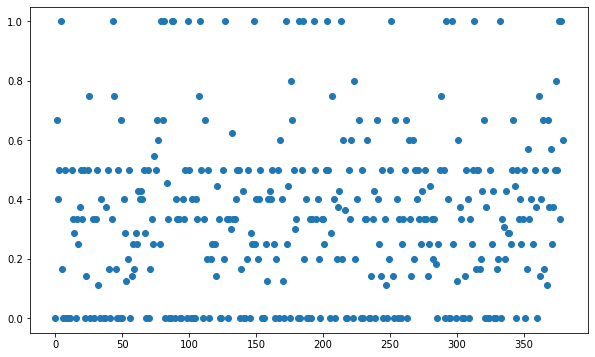

In [13]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(clean_season_dfs[0]['ratio'], 'o')
plt.show();

In [14]:
# % occurrence of each ratio
clean_season_dfs[0]['ratio'].dropna().value_counts().sort_index() / clean_season_dfs[0]['ratio'].value_counts().sum()

0.000000    0.227882
0.111111    0.008043
0.125000    0.010724
0.142857    0.026810
0.166667    0.029491
0.181818    0.002681
0.200000    0.048257
0.250000    0.067024
0.285714    0.021448
0.300000    0.005362
0.307692    0.002681
0.333333    0.117962
0.363636    0.002681
0.375000    0.021448
0.400000    0.072386
0.428571    0.026810
0.444444    0.010724
0.454545    0.002681
0.500000    0.136729
0.545455    0.002681
0.571429    0.005362
0.600000    0.024129
0.625000    0.002681
0.666667    0.037534
0.750000    0.016086
0.800000    0.008043
1.000000    0.061662
Name: ratio, dtype: float64

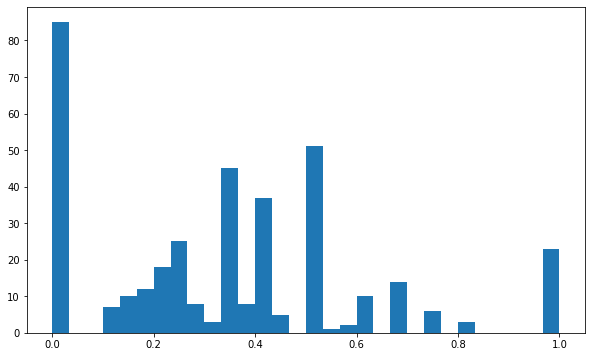

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
val_counts = clean_season_dfs[0]['ratio'].value_counts().sort_index()
ax.hist(clean_season_dfs[0]['ratio'].dropna(), bins=30)
plt.show();

In [16]:
# https://stackoverflow.com/questions/44592370/runtimewarning-when-using-scipy-stats-beta-fit
ratios = clean_season_dfs[0]['ratio'].dropna()
alpha_param, beta_param, _, _ = beta.fit(ratios, loc=0, scale=1)
print(alpha_param)
print(beta_param)

0.5539997841886173
4.584990930492928


/home/david/anaconda3/envs/ana_py37/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


In [20]:
# https://emredjan.github.io/blog/2017/07/19/plotting-distributions/?source=post_page-----c5ebaafdeedd----------------------
def plot_beta(x_range, a, b, mu=0, sigma=1, cdf=False, **kwargs):
    '''
    Plots the f distribution function for a given x range, a and b
    If mu and sigma are not provided, standard beta is plotted
    If cdf=True cumulative distribution is plotted
    Passes any keyword arguments to matplotlib plot function
    '''
    x = x_range
    if cdf:
        y = beta.cdf(x, a, b, mu, sigma)
    else:
        y = beta.pdf(x, a, b, mu, sigma)
    plt.plot(x, y, **kwargs)

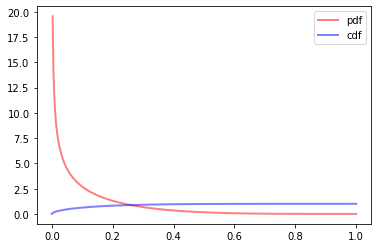

In [21]:
x = np.linspace(0,1, len(ratios))
plot_beta(x, alpha_param, beta_param, 0, 1, color='red', lw=2, ls='-', alpha=0.5, label='pdf')
plot_beta(x, alpha_param, beta_param, 0, 1, cdf=True, color='blue', lw=2, ls='-', alpha=0.5, label='cdf')
plt.legend();

In [19]:
stop

NameError: name 'stop' is not defined

In [ ]:
def insert_game_day(df_orig):
    df = df_orig.copy(deep=True)
    df['game_day'] = df.groupby(by='date').ngroup(ascending=True)
    return df

In [ ]:
def get_game_day_change_indices(df):
    return df['game_day'].diff()[df['game_day'].diff() != 0].index.values

In [ ]:
def poiss_reshape_train_data(df):
    return pd.concat([df[['h','a','h_ftGoals']].assign(home=1).rename(
                     columns={'h':'team', 'a':'opponent','h_ftGoals':'goals'}),
                     df[['a','h','a_ftGoals']].assign(home=0).rename(
                     columns={'a':'team', 'h':'opponent','a_ftGoals':'goals'})])

In [ ]:
def fit_poiss_model(train_data):
    """
    For the first games of the season the model will not run
    There is perfect sparation or not enough data
    So catch the exceptions and explicitly return None
    The function catching this data must deal with a none return value
    """
    try:
        return smf.glm(formula="goals ~ home + team + opponent",
                       data=train_data, 
                       family=sm.families.Poisson()).fit()
    except sm_exceptions.PerfectSeparationError:
        return None
    except ValueError:
        return None

In [ ]:
def get_poiss_preds(model, predict_data):
    
    h_preds = model.predict(pd.DataFrame(data={'team': predict_data['h'].values,
                                               'opponent': predict_data['a'].values,
                                               'home':1}))
    a_preds = model.predict(pd.DataFrame(data={'team': predict_data['a'].values,
                                                  'opponent': predict_data['h'].values,
                                                  'home':0}))
    return h_preds.values, a_preds.values

In [ ]:
def run_model_predict_cycles(df_orig):
    df = df_orig.copy(deep=True)
    df = insert_game_day(df)
    game_day_indices = get_game_day_change_indices(df)
    
    # We can only attempt to predict after the first game day so we start looping at 1
    for gd_index in game_day_indices[1:]:
        n_game_day = df.iloc[gd_index]['game_day']
        train_data = df[df['game_day'] < n_game_day]
        predict_data = df[df['game_day'] == n_game_day]
    
        # 3 functions below and the new column assignments are all coupled
        # All must be changed for different model
        # Should extract this block into a interchangable function
        # for different models or write a class with\
        # reshape, fit, predict, insert methods
        poiss_reshaped_train_data = poiss_reshape_train_data(train_data)
        poiss_model = fit_poiss_model(poiss_reshaped_train_data)
        if poiss_model is not None:
            poiss_pred_h_coeffs, poiss_pred_a_coeffs = get_poiss_preds(poiss_model, predict_data)
            df.loc[predict_data.index, 'h_poissPred'] = poiss_pred_h_coeffs
            df.loc[predict_data.index, 'a_poissPred'] = poiss_pred_a_coeffs
        else:
            df.loc[predict_data.index, 'h_poissPred'] = np.NaN
            df.loc[predict_data.index, 'a_poissPred'] = np.NaN  
        # We can run this through a numpy matrix function to return
        # - h_poissProbWin
        # - h_poissProbDraw
        # - a_poissProbWin
        # - a_poissProbDraw
        # End of coupled block of functions
        
    return df
        
        
df = run_model_predict_cycles(season_df)
df

In [ ]:
stop

In [ ]:
epl_1617['seasonPercentile'] = epl_1617['game_day'].rank(method='max', pct=True)
epl_1617.head()

In [ ]:
epl_1617.tail(15)

In [ ]:
stop

In [ ]:
epl_1617 = epl_1617[:-10]
epl_1617.mean()


In [ ]:
epl_1617.head()

In [ ]:
epl_1617.tail()

In [ ]:
epl_1617.shape

In [ ]:
goal_model_data = pd.concat([epl_1617[['h','a','h_ftGoals']].assign(home=1).rename(
            columns={'h':'team', 'a':'opponent','h_ftGoals':'goals'}),
           epl_1617[['a','h','a_ftGoals']].assign(home=0).rename(
            columns={'a':'team', 'h':'opponent','a_ftGoals':'goals'})])
goal_model_data.head()

In [ ]:
goal_model_data.iloc[365:374]

In [ ]:
goal_model_data.tail()

In [ ]:
goal_model_data.shape

In [ ]:
poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=goal_model_data, 
                        family=sm.families.Poisson()).fit()
poisson_model.summary()

In [ ]:
poisson_model.predict(pd.DataFrame(data={'team': 'Chelsea', 'opponent': 'Sunderland',
                                       'home':1},index=[1]))

In [ ]:
poisson_model.predict(pd.DataFrame(data={'team': 'Sunderland', 'opponent': 'Chelsea',
                                       'home':0},index=[1]))


## Jordan Tigani Logistic Regression

https://www.youtube.com/watch?v=m2rhRJkWOEI&list=PLatexvNeFffyzlyAtDiUffmokReDzTQk6

https://github.com/GoogleCloudPlatform/ipython-soccer-predictions/blob/master/predict/wc-final.ipynb

In [ ]:
# 1 is home team, -1 is away team
cBr = [1,0,1,0,0,-1]
cMe = [0,1,-1,0,-1,0]
cCr = [-1,0,0,-1,1,0]
cCa = [0,-1,0,1,0,1]
h_ftGoals = [3,1,0,0,1,1]
a_ftGoals = [1,0,0,4,3,4]
df = pd.DataFrame({'brazil': cBr, 'mexico': cMe, 'croatia': cCr, 'camaroon': cCa,
                   'h_ftGoals': h_ftGoals, 'a_ftGoals': a_ftGoals, 'intercept': [1]*6})
df['goalDiff'] = df['h_ftGoals'].sub(df['a_ftGoals'])
df.head(10)

In [ ]:
def points_to_sgn(p):
  if p > 0.1: return 1.0
  elif p < -0.1: return -1.0
  else: return 0.0

df['points'] = df['goalDiff'].apply(points_to_sgn)
df.head(10)

In [ ]:
X = df[['brazil', 'mexico', 'croatia', 'camaroon']].values
y = df['points'].values

In [ ]:
X

model = sm.Logit(y, X).fit_regularized(method='l1', alpha=1.5)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-18-05366f0d4b80> in <module>
----> 1 model = sm.Logit(y, X).fit_regularized(method='l1', alpha=1.5)

~/anaconda3/envs/ana_py37/lib/python3.7/site-packages/statsmodels/discrete/discrete_model.py in __init__(self, endog, exog, **kwargs)
    430         if (not issubclass(self.__class__, MultinomialModel) and
    431                 not np.all((self.endog >= 0) & (self.endog <= 1))):
--> 432             raise ValueError("endog must be in the unit interval.")
    433 
    434 

ValueError: endog must be in the unit interval.



From Jordan's github ipython notebook

power_data = power.add_power(club_data, game_summaries, power_cols)
power_train = power_data.loc[power_data['points'] <> 1] ??? - What is he modeling here? Draws and Home Wins ?

###### power_train = power_data
(power_model, power_test) = world_cup.train_model(
    power_train, match_stats.get_non_feature_columns())
print "\nRsquared: %0.03g, Power Coef %0.03g" % (
    power_model.prsquared, 
    math.exp(power_model.params['power_points']))  
    
I think that Jordan's model is modeling win/lose - There are no draws in the world cup. This is why he is able to do
a straight forward ROC Curve - he is modeling a binary outcome
   

## My Attempt

In [ ]:
epl_1617 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/E0.csv")
epl_1617 = epl_1617[['HomeTeam','AwayTeam','FTHG','FTAG']]
epl_1617 = epl_1617.rename(columns={'HomeTeam': 'h', 'AwayTeam': 'a','FTHG': 'h_ftGoals', 'FTAG': 'a_ftGoals'})
epl_1617 = epl_1617[:-10]
epl_1617['goalDiff'] = epl_1617['h_ftGoals'] - epl_1617['a_ftGoals']
epl_1617.head()

In [ ]:
# Construct and print model matrix for color as categorical variable
matrix= dmatrix('C(h)', data = epl_1617, return_type = 'dataframe')

In [ ]:
matrix.head()

In [ ]:
cols = [col for col in matrix.columns if col != 'Intercept']
len(cols)

19 columns for 20 teams

In [ ]:
# Construct and print model matrix for color as categorical variable
matrices= dmatrices('h_ftGoals ~ C(h) + C(a)', data = epl_1617, return_type = 'dataframe')

In [ ]:
matrices[0].head()

In [ ]:
matrices[1].head()

In [ ]:
h_ftGoals_model = smf.glm(formula="h_ftGoals ~ h + a", data=epl_1617, 
                        family=sm.families.Poisson()).fit()
h_ftGoals_model.summary()

In [ ]:
a_ftGoals_model = smf.glm(formula="a_ftGoals ~ h + a", data=epl_1617, 
                        family=sm.families.Poisson()).fit()
a_ftGoals_model.summary()

In [ ]:
h_ftGoals_model.predict(pd.DataFrame(data={'h': 'Chelsea', 'a': 'Sunderland'},index=[1]))


In [ ]:
a_ftGoals_model.predict(pd.DataFrame(data={'h': 'Chelsea', 'a': 'Sunderland'},index=[1]))


In [ ]:
h_ftGoals_model.predict(pd.DataFrame(data={'a': 'Sunderland', 'h': 'Chelsea'},index=[1]))

### This is just making things more complicated, and creating more work to get to the results - Abandon and use David Sheehan's Poisson Regression

## Incorporating as a Feature - Draft

In [ ]:
epl_1617 = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/E0.csv", dayfirst=True, parse_dates=['Date'])
epl_1617 = epl_1617[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]
epl_1617 = epl_1617.rename(columns={'Date': 'date', 'HomeTeam': 'h', 'AwayTeam': 'a',
                                    'FTHG': 'h_ftGoals',
                                    'FTAG': 'a_ftGoals'}).sort_values(by='date').reset_index(drop=True)
epl_1617.head()

In [ ]:
epl_1617.tail()

In [ ]:
epl_1617['game_day'] = epl_1617.groupby(by='date').ngroup(ascending=True)
epl_1617.head(20)

In [ ]:
epl_1617.tail(20)

In [ ]:
# We want to calculate the home and away coefficient for each team and set it as a feature
# We need some built up history to make this work
# Arbitrarily pick game day 50 - halway thorugh the season as an initial experiment
# Calculate the coeeficients on each progressive match day and place them into the dataframe as a feature

In [ ]:
epl_1617[epl_1617['game_day'] >= 50].head()

In [ ]:
# Game Day 50 is 189 games into the season, so will have an adequate record of home and away wins by this time

In [ ]:
# Indices where the game day changes
# we will step through these from 188 and up (inclusive)
change_indices = epl_1617['game_day'].diff()[epl_1617['game_day'].diff() != 0].index.values
change_indices

In [ ]:
# First add columns for each team, then run the regression at each change in the game day,
# and fill the team column with the appropriate regression coefficients, 
# ? Fill h_h_coeff, h_a_coeff, a_a_coeff, a_h_coeff ? - Try this to start
# Then can coefficients be calculated based on odds or implied probailities ?
# Also in a seperate notebook, look at decile of season completed as a feature

In [ ]:
def h_coeff(h_val):
    lookup = 'team[T.'+ h_val + ']'
    if lookup in poisson_model.params.index.values:
        return poisson_model.params[lookup]
    else:
        return 0
    
def a_coeff(a_val):
    lookup = 'opponent[T.'+ a_val + ']'
    if lookup in poisson_model.params.index.values:
        return poisson_model.params[lookup]
    else:
        return 0

n = 0
for change_index in change_indices[50:]:
    print(change_index)
    n_game_day = epl_1617.iloc[change_index]['game_day']
    print(n_game_day)
    train_data = epl_1617[epl_1617['game_day'] < n_game_day]
    #print(train_data.tail())
    predict_data = epl_1617[epl_1617['game_day'] == n_game_day]
    print(predict_data.head())
    # print(predict_data.head(10))
    reshaped_train_data = pd.concat([train_data[['h','a','h_ftGoals']].assign(home=1).rename(
                                    columns={'h':'team', 'a':'opponent','h_ftGoals':'goals'}),
                                     train_data[['a','h','a_ftGoals']].assign(home=0).rename(
                                    columns={'a':'team', 'h':'opponent','a_ftGoals':'goals'})])
    
    poisson_model = smf.glm(formula="goals ~ home + team + opponent", data=reshaped_train_data, 
                        family=sm.families.Poisson()).fit()

   
    predict_data['h_coeff'] = poisson_model.params["home"] + predict_data['h'].apply(h_coeff)
    predict_data['a_coeff'] = predict_data['a'].apply(a_coeff)
    print(predict_data.head())
    n += 1
    if n == 3:
        break



In [ ]:
poisson_model.params["team[T.Stoke]"]

In [ ]:
poisson_model.params["home"]

In [ ]:
poisson_model.params["opponent[T.Watford]"]

In [ ]:
poisson_model.params

In [ ]:
type(poisson_model.params)

In [ ]:
poisson_model.params.index

## Incorporating as a Feature

In [ ]:
season_df = pd.read_csv("http://www.football-data.co.uk/mmz4281/1617/E0.csv", dayfirst=True, parse_dates=['Date'])
season_df = season_df[['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG']]
season_df = season_df.rename(columns={'Date': 'date', 'HomeTeam': 'h', 'AwayTeam': 'a',
                                    'FTHG': 'h_ftGoals',
                                    'FTAG': 'a_ftGoals'}).sort_values(by='date').reset_index(drop=True)
season_df.head()

### This is very interesting - How does a team's poisson mu value change over time?

In [ ]:
crit1 = df['h'] == 'Liverpool'
crit2 = df['a'] == 'Liverpool'
df_liverpool = df[crit1 | crit2]
df_liverpool.head(30)

## Evolution of Poisson Expected Goals over Season home and away - Top 3, Bottom 3 Teams

https://en.wikipedia.org/wiki/2016%E2%80%9317_Premier_League

In [ ]:
team = 'Chelsea'
crit1 = df['h'] == team
crit2 = df['a'] == team
df_team = df[crit1 | crit2]

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(df_team[df['h'] == team]['h_poissPred'].values, label='h')
ax.plot(df_team[df['a'] == team]['a_poissPred'].values, label='a')
ax.set_ylim((0,6))
plt.legend()
plt.show();

In [ ]:
team = 'Tottenham'
crit1 = df['h'] == team
crit2 = df['a'] == team
df_team = df[crit1 | crit2]

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(df_team[df['h'] == team]['h_poissPred'].values, label='h')
ax.plot(df_team[df['a'] == team]['a_poissPred'].values, label='a')
ax.set_ylim((0,6))
plt.legend()
plt.show();

In [ ]:
team = 'Man City'
crit1 = df['h'] == team
crit2 = df['a'] == team
df_team = df[crit1 | crit2]

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(df_team[df['h'] == team]['h_poissPred'].values, label='h')
ax.plot(df_team[df['a'] == team]['a_poissPred'].values, label='a')
ax.set_ylim((0,6))
plt.legend()
plt.show();

In [ ]:
team = 'Hull'
crit1 = df['h'] == team
crit2 = df['a'] == team
df_team = df[crit1 | crit2]

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(df_team[df['h'] == team]['h_poissPred'].values, label='h')
ax.plot(df_team[df['a'] == team]['a_poissPred'].values, label='a')
ax.set_ylim((0,6))
plt.legend()
plt.show();

In [ ]:
team = 'Middlesbrough'
crit1 = df['h'] == team
crit2 = df['a'] == team
df_team = df[crit1 | crit2]

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(df_team[df['h'] == team]['h_poissPred'].values, label='h')
ax.plot(df_team[df['a'] == team]['a_poissPred'].values, label='a')
ax.set_ylim((0,6))
plt.legend()
plt.show();

In [ ]:
team = 'Sunderland'
crit1 = df['h'] == team
crit2 = df['a'] == team
df_team = df[crit1 | crit2]

fig, ax = plt.subplots(figsize=(10,7))
ax.plot(df_team[df['h'] == team]['h_poissPred'].values, label='h')
ax.plot(df_team[df['a'] == team]['a_poissPred'].values, label='a')
ax.set_ylim((0,6))
plt.legend()
plt.show();